### DSCC483.1.FALL2023ASE 
### Capstone Mini-Project  
#### Kaggle Project: Classification of Tweets of Politicians from Northern Europe 
#### Submitted By: Richa Yadav(32381047), Aradhya Mathur (32384567)

In [1]:
# importing important libraries
import numpy as np                
import pandas as pd     
import matplotlib.pyplot as plt   
import seaborn as sns
import plotly.express as px
import nltk 
import ast
import warnings                  
warnings.filterwarnings('ignore')

About the data

This dataset consists of all tweets posted by politicians of seven different Northern European countries: Belgium, Denmark, Iceland, Ireland, Netherlands, Norway, and Sweden. You will have: 
- Tweets posted by politicians of seven Northern European countries mentioned above2 
- Each country is associated with a different number of tweets. The test set consists of %20 of the tweets originating from each country (the remaining 80% is the training set).
- In total, there are 407,223 tweets in the training set (and 101,808 tweets in the test set). This makes a total of 509,031 tweets.  

Kaggle Project – Data Dictionary 
The data has been provided in the assignment folder online (training_data.csv and test_data.csv). Open the CSV files and take a look at them before starting. Individual features (columns) of the dataset have been described below:  
- hashtags: The list of hashtags included in the tweet 
- full_text: The text of tweet (including emojis, htmls, hashtags) 
- in_reply_to_screen_name: The Twitter screen name of the user the owner of the tweet is replying to (if any) 
- country_user: Country of the owner of the tweet 
- pol_spec_user: Political view of the owner of the tweet (found only on the training dataset) 
- Id: An index number associated with tweets (found only on the test dataset) 

In [2]:
# importing training dataset 
train_data = pd.read_excel('training_data.xlsx')
pd.set_option('display.max_colwidth', None)
train_data.head()

hashtags  \
0  feminist AskMeAnything   
1                     NaN   
2                     NaN   
3                     NaN   
4                     NaN   

                                                                                                                                                                             full_text  \
0                           b'RT @swedennewyork: What does it mean to have a #feminist government? Join us on @reddit at 10 am (EST) Friday 3/23 for an #AskMeAnything se\xe2\x80\xa6'   
1                                                                          b'Jens Stoltenberg \xc3\xa5pnet virtuelle Rockheim i dag, sjekk det ut du ogs\xc3\xa5 http://bit.ly/1B6Nt5'   
2                                                                                                                      b'@Panenka_Bart Veel beterschap Bart en Loes! \xf0\x9f\xa5\xb0'   
3  b'RT @CarlEmilLind: Tydelige S aftryk: \n\nPskykiatrien styrkes\n110% CO2 reduktion i 2050 \nPraktisk folkeskole + mesterl\xc3\xa6re\nAnnulationss\xc3\xb8gsm\xc3\xa5l\xe2\x80\xa6'   
4                                                                                                                                          b'\xf0\x9f\x98\x83 https://t.co/bpqoZ8Y4wm'   

  in_reply_to_screen_name country_user gender_user pol_spec_user  
0                     NaN       sweden        Male          Left  
1                     NaN       norway        Male          Left  
2             BartDerwael      belgium        Male          Left  
3                     NaN      denmark      Female          Left  
4                     NaN       sweden        Male          Left

In [3]:
# decoding UTF-8 encoded data
train_data['full_text'] = train_data['full_text'].map(lambda v: ast.literal_eval(v).decode())
train_data.head(5)

hashtags  \
0  feminist AskMeAnything   
1                     NaN   
2                     NaN   
3                     NaN   
4                     NaN   

                                                                                                                                          full_text  \
0      RT @swedennewyork: What does it mean to have a #feminist government? Join us on @reddit at 10 am (EST) Friday 3/23 for an #AskMeAnything se…   
1                                                        Jens Stoltenberg åpnet virtuelle Rockheim i dag, sjekk det ut du også http://bit.ly/1B6Nt5   
2                                                                                                     @Panenka_Bart Veel beterschap Bart en Loes! 🥰   
3  RT @CarlEmilLind: Tydelige S aftryk: \n\nPskykiatrien styrkes\n110% CO2 reduktion i 2050 \nPraktisk folkeskole + mesterlære\nAnnulationssøgsmål…   
4                                                                                                                         😃 https://t.co/bpqoZ8Y4wm   

  in_reply_to_screen_name country_user gender_user pol_spec_user  
0                     NaN       sweden        Male          Left  
1                     NaN       norway        Male          Left  
2             BartDerwael      belgium        Male          Left  
3                     NaN      denmark      Female          Left  
4                     NaN       sweden        Male          Left

#### Part I: Descriptive Analysis (20 points)
In this part of the analysis, you will be exploring some introductory NLP (natural language processing) techniques to better understand the data. Use the training dataset for the descriptive analysis. <br>
[Important note: If you are an undergraduate student, please only answer the questions in Section A. If you are a graduate student, please answer Section A and Section B.] 

#### Section A (20 points for undergraduate students, 10 points for graduate students): For all questions below, please use the training dataset. 

#### a) Create a table that contains information on minimum, average, median, and maximum for the following: tweet length (#characters and #words) (text column), hashtag length (#characters and #words) (hashtags column)

In [4]:
# creating a new dataset with full_text and hashtags
text_hash = train_data[['full_text','hashtags']]
text_hash['full_text'] = text_hash['full_text'].astype("string")
text_hash['hashtags'] = text_hash['hashtags'].astype("string")
text_hash.head()

full_text  \
0  RT @swedennewyork: What does it mean to have a #feminist government? Join us on @reddit at 10 am (EST) Friday 3/23 for an #AskMeAnything se…   
1                                                    Jens Stoltenberg åpnet virtuelle Rockheim i dag, sjekk det ut du også http://bit.ly/1B6Nt5   
2                                                                                                 @Panenka_Bart Veel beterschap Bart en Loes! 🥰   
3   RT @CarlEmilLind: Tydelige S aftryk: 

Pskykiatrien styrkes
110% CO2 reduktion i 2050 
Praktisk folkeskole + mesterlære
Annulationssøgsmål…   
4                                                                                                                     😃 https://t.co/bpqoZ8Y4wm   

                 hashtags  
0  feminist AskMeAnything  
1                    <NA>  
2                    <NA>  
3                    <NA>  
4                    <NA>

In [5]:
# tweet and hashtags - characters length
text_hash['text_char_len'] = text_hash['full_text'].str.len()
text_hash['hashtags_char_len'] = text_hash['hashtags'].str.len()

In [6]:
# tweet and hashtags - word length
text_hash['text_word_len'] = text_hash['full_text'].str.split().apply(len)
text_hash.loc[text_hash['hashtags'].notnull(), 'hashtags_word_len'] = text_hash.loc[text_hash['hashtags'].notnull(), 'hashtags'].str.split().apply(len)

In [7]:
# Table with characters and word length
text_hash.head(5)

full_text  \
0  RT @swedennewyork: What does it mean to have a #feminist government? Join us on @reddit at 10 am (EST) Friday 3/23 for an #AskMeAnything se…   
1                                                    Jens Stoltenberg åpnet virtuelle Rockheim i dag, sjekk det ut du også http://bit.ly/1B6Nt5   
2                                                                                                 @Panenka_Bart Veel beterschap Bart en Loes! 🥰   
3   RT @CarlEmilLind: Tydelige S aftryk: 

Pskykiatrien styrkes
110% CO2 reduktion i 2050 
Praktisk folkeskole + mesterlære
Annulationssøgsmål…   
4                                                                                                                     😃 https://t.co/bpqoZ8Y4wm   

                 hashtags  text_char_len  hashtags_char_len  text_word_len  \
0  feminist AskMeAnything            140                 22             25   
1                    <NA>             90               <NA>             13   
2                    <NA>             45               <NA>              7   
3                    <NA>            139               <NA>             17   
4                    <NA>             25               <NA>              2   

   hashtags_word_len  
0                2.0  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [8]:
# table containing min, max, median and average for characters and word length  
text_hash_describe = pd.DataFrame(text_hash.describe())
text_hash_describe

text_char_len  hashtags_char_len  text_word_len  hashtags_word_len
count       407223.0           127040.0  407223.000000      127040.000000
mean       140.31248          14.089948      20.284048           1.577724
std        63.191109          10.471846      10.144777           0.956729
min              1.0                1.0       1.000000           1.000000
25%            109.0                7.0      14.000000           1.000000
50%            140.0               11.0      19.000000           1.000000
75%            140.0               18.0      24.000000           2.000000
max            862.0              145.0      89.000000          16.000000

#### Inference
1) Text Character Length:
Min: 1 ; Max: 862 ; Avg: 140.31 ; Median: 140
2) Hashtags Character Length:
Min: 1 ; Max: 145 ; Avg: 14.09 ; Median: 11
3) Text Word Length:
Min: 1 ; Max: 89 ; Avg: 20.28 ; Median: 19
4) Hashtags Word Length:
Min: 1 ; Max: 16 ; Avg: 1.58 ; Median: 1

#### b) Find the top ten most commonly used hashtags (hashtags column) in each country. Then, create pie charts (one pie chart per country) which show the distribution of these ten most commonly used hashtags for each country. Do you observe any patterns? What are the meanings / interpretations of the hashtags you have identified?

In [9]:
# creating a new dataset with country_user, hashtags
# filtering null hashtags
user_hashtag = train_data[['country_user','hashtags']]
user_hashtag = user_hashtag[user_hashtag['hashtags'].notnull()]
# using str.split function to split hashtags into a list of hashtags
user_hashtag['hashtags'] = user_hashtag['hashtags'].str.split()
user_hashtag.head()

country_user                   hashtags
0        sweden  [feminist, AskMeAnything]
9        norway                   [Cyprus]
13      belgium            [anhienNealyse]
14      denmark               [IPAC, IPAC]
20      denmark             [sommerstævne]

In [10]:
# based on country - grouping hashtags 
user_hashtag = user_hashtag.groupby('country_user').agg(sum)
user_hashtag.head()

hashtags
country_user                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
belgium                                                                                                                        [anhienNealyse, fordgenk, villapolitica, Begov, begrotingstekort, staatschuld, RuleOfLaw, Malta, Europe, Zeus, King, EuropeanUnion, culture, diversity, Greekmythology, thisiswhy, de1000km, ikbenWIJ, UE, Sahel, Marche, Vlareg, walgov, WallonieRelance, Houffalize, ProvLux, Brexit, LeSaviezVs, élection, terrorisme, sécurité, HateSpeech, Vienne, IDEVAW, Europe, SayNoStopVAW, orangetheworld, womensrightsarehumanrights, Kompassklub, grgent, haiku, EUelections2019, Hangout, Eerstelijnshervorming, zorg, eerstelijn, zorgvoorelkaar, IdéesPS, Leuven, Paris, RuleOfLaw, zwalm2012, oostende, geestelijkegezondheidszorg, Avanti, EnvoyeSpecial, CETA, ForMigration, EtudeSolidaris, civielebescherming, LGBTI, IDAHOT, glyphosate, Youtube, triebru15, walgov, nouveauCETA, BEmissionCHN, tvlnieuws, Vito, primeur, monaviscompte, Kluisbos, OCMW, climatechange, climate, EPhearings2019, productsafety, terrorisme, NATOPA, électricité, PS, naamkeuze, ouioui, COVID19, cancer, ONG, Selembao, Kinshasa, RDCongo, RDC, solidarité, SouthAfrica, Malta, uzbrussel, PVF, Hautekiet, Ebola, Congo, ItWasTime, ...]
denmark                                                                                                                                                                                                                                                                                                      [IPAC, IPAC, sommerstævne, dkpol, Finland, Sweden, NATO, refugee, dkiverden, dkpol, dagenskarikatur, comebackkids, energiewende, Afghanistan, ISAF, eudk, dkpol, uddpol, tårernesEuropa, EUbudget, dkpol, eupol, dkpol, TeamJunckerEU, dkpol, ValgflæskAlarm, dkpol, dktrp, dkpol, Politiken, Stoklund, dkpol, dkpol, dkforsvar, WeAreNATO, dr3valg, dkpol, dkgreen, fv15, G20, eudk, EUCO, dkpol, refugees, unhcr, offdig, digidk, dkpol, dkgreen, womenintech, dkpol, dkpol, dkpol, dkpol, dkpol, ForDanmark, WEURO2022, Energiewende2015, dkpol, danskebank, danskerhverv, dkpol, dkpol, dkgreen, elpriser, HRC32, FutureBuildings, dkpol, climate, Nyruphus, HelsingørKommmune, sdg2, dkpol, dkgreen, dkpol, UNGA, dkpol, innovation, dkinno, dkbiz, dkpol, voresnatur, dkgreen, dkpol, dkpol, stemja, dkpol, dkaid, LGBTI, ligestilling, dkpol, dkpol, dataetik, digitalisering, dkpol, dkpol, faglærttilfremtiden, dkpol, eud, dkpol, ...]
iceland                                              [Iceland, IcelandSecrets, hressandi, borgarstjórn, lífskjarasamningur, þeimtókstaðstöðvahjólatvinnulífsins, SmallStates, panamapapers, cashljós, tortólastjórnin, northernlights, winning, emisland, ForMin, NATO, WashingtonDC, solidarity, freetrade, trade, Brexit, StóruMálin, Léttir, afhjúpun, Íru

In [11]:
# Finding the top ten most commonly used hashtags (hashtags column) in each country separately.
hashtag_freq_dict = {}
user_hashtag = user_hashtag.reset_index()
for index, row in user_hashtag.iterrows():
    hashtag_freq_dict[row['country_user']] = nltk.FreqDist(row['hashtags']).most_common(10)
user_hashtag_df = pd.DataFrame(columns=['Country', 'Top 10 Hashtags'])
for country, top_hashtags in hashtag_freq_dict.items():
    user_hashtag_df = user_hashtag_df.append({'Country': country, 'Top 10 Hashtags': top_hashtags}, ignore_index=True)
user_hashtag_df

Country  \
0      belgium   
1      denmark   
2      iceland   
3      ireland   
4  netherlands   
5       norway   
6       sweden   

                                                                                                                                                               Top 10 Hashtags  
0                 [(begov, 1291), (COVID19, 752), (EU, 382), (RuleOfLaw, 348), (Wallonie, 335), (WalGov, 292), (Ukraine, 284), (walgov, 276), (UNGA, 263), (coronavirus, 263)]  
1                            [(dkpol, 16090), (dkgreen, 1880), (eudk, 802), (dkaid, 664), (dktrp, 648), (NATO, 594), (dkbiz, 573), (fmdk, 523), (Ukraine, 397), (kbhpol, 363)]  
2  [(Iceland, 97), (12stig, 42), (AskNordicAmbs, 37), (emisland, 33), (forseti, 30), (NordicUSAsummit, 25), (Nordic, 23), (NordicDayUSA, 21), (cashljós, 20), (kosningar, 20)]  
3    [(COVID19, 541), (Brexit, 391), (Limerick, 350), (OurRuralFuture, 323), (Eurogroup, 231), (Ireland, 202), (GE2020, 199), (Ukraine, 190), (LE19, 156), (HumanRights, 147)]  
4                     [(nutrition, 782), (D66, 273), (food, 149), (EUGreenDeal, 143), (NS, 134), (COVID19, 113), (Delft, 113), (SDGs, 113), (people, 107), (foodsystems, 101)]  
5         [(NATO, 779), (Cyprus, 310), (dax18, 214), (Ukraine, 194), (Norway, 182), (nrkdebatt, 162), (nrkvalg, 161), (likestilling, 155), (Russia, 141), (vaccineswork, 121)]  
6             [(svpol, 1599), (fb, 707), (COVID19, 366), (GenerationEquality, 286), (klimat, 267), (bopol, 260), (MigrationEU, 212), (EU, 198), (pldebatt, 178), (föpol, 175)]

In [12]:
# Top 10 Hashtags for every country
custom_colors = px.colors.sequential.Blues_r[:10]
chart_width = 300  
chart_height = 300 
# iterating through the DataFrame and create a pie chart for each country
for index, row in user_hashtag_df.iterrows():
    country = row['Country']
    top_hashtags = row['Top 10 Hashtags']
    hashtags, counts = zip(*top_hashtags)
    
    pie_df = pd.DataFrame({'Hashtags': hashtags, 'Counts': counts})

    fig = px.pie(pie_df, names='Hashtags', values='Counts',
                 color_discrete_sequence=custom_colors)
    fig.update_layout(
        title=f'Top 10 Hashtags in {country}', 
        title_x=0, 
        margin=dict(l=0, r=0, b=0, t=40),
        legend=dict(x=1, y=1), 
        width=chart_width,  
        height=chart_height, 
    )
    fig.update_traces(marker_line_color='black', marker_line_width=1)
    # ploting
    fig.show()

#### Inferences:
1) Belgium and COVID-19 Focus: Belgium's top hashtags prominently feature COVID-19 related tags, with "COVID19" being one of the most frequently used hashtags. This suggests that discussions related to the pandemic are prevalent in Belgian social media discourse.
2) Denmark's Political Engagement: Denmark's hashtags reflect a strong engagement in political discussions with hashtags like "dkpol" (Danish politics) and "dkgreen" (Danish green initiatives) appearing as the most frequently used. This indicates active political participation and environmental awareness in Denmark.
3) Iceland's Cultural and Political Engagement:Iceland's hashtags include a mix of cultural references and political discussions, with hashtags like "Iceland," "12stig" (12 points, possibly related to Eurovision), and "AskNordicAmbs" (asking Nordic ambassadors) indicating diverse social media engagement.
4) Ireland and Brexit Concerns: Ireland's hashtags prominently feature "Brexit," indicating the country's significant interest and concerns related to the United Kingdom's departure from the European Union. Additionally, "Limerick" suggests regional discussions.
5) Netherlands' Focus on Nutrition: The Netherlands' hashtags are centered around nutrition and sustainability, with "nutrition," "food," and "foodsystems" appearing among the top hashtags. This reflects a focus on healthy eating and sustainable food practices in the country.
6) Norway's International Engagement: Norway's hashtags include international topics such as "NATO," "Cyprus," and "Ukraine," indicating the country's engagement in global affairs. Additionally, hashtags related to gender equality ("likestilling") and vaccines ("vaccineswork") show a commitment to important social issues.
7) Sweden's Political Discourse: Sweden's top hashtags include "svpol" (Swedish politics) and "pldebatt" (planning debate), highlighting active political discourse and urban planning discussions. "COVID19" also appears, reflecting ongoing pandemic-related discussions.

#### c) Create a stacked bar chart (one stacked bar per country) that shows the percentage of political views associated with each country. [Create normalized bars to show percentages: minimum should be 0, maximum should be 1 (or 0% and 100%)]. Interpret your findings.

In [13]:
# creating a new dataset with country_user, pol_spec_user
country_pol = train_data[['country_user','pol_spec_user']]
country_pol['pol_spec_user'] = country_pol['pol_spec_user'].str.split()
# aggregating all political views - grouping based on country level
country_pol = country_pol.groupby('country_user').agg(sum)
country_pol = country_pol.reset_index()
country_pol.head()

country_user  \
0      belgium   
1      denmark   
2      iceland   
3      ireland   
4  netherlands   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           pol_spec_user  
0                                           [Left, Right, Center, Center, Center, Right, Left, Right, Right, Center, Left, Left, Right, Right, Right, Right, Right, Center, Right, Right, Center, Center, Left, Right, Right, Left, Right, Right, Center, Right, Right, Right, Right, Right, Center, Left, Left, Left, Right, Left, Right, Right, Right, Right, Center, Right, Center, Right, Right, Left, Center, Left, Left, Left, Center, Right, Left, Left, Center, Left, Right, Center, Center, Left, Left, Right, Left, Right, Right, Center, Right, Right, Center, Center, Center, Left, Right, Right, Left, Left, Right, Right, Right, Right, Center, Left, Left, Right, Center, Left, Right, Center, Right, Left, Right, Left, Left, Left, Center, Center, ...]  
1                                           [Left, Left, Center, Center, Left, Left, Right, Left, Right, Right, Left, Center, Left, Right, Center, Left, Right, Center, Right, Left, Right, Right, Right, Center, Center, Left, Center, Left, Right, Center, Right, Right, Left, Right, Left, Center, Center, Center, Left, Left, Left, Right, Center, Left, Left, Center, Center, Left, Center, Left, Left, Left, Center, Center, Right, Left, Left, Right, Center, Center, Right, Center, Center, Center, Left, Right, Left, Right, Center, Right, Left, Right, Left, Right, Left, Left, Left, Right, Right, Center, Center, Right, Left, Center, Center, Center, Right, Left, Right, Left, Right, Left, Left, Center, Center, Center, Left, Right, Left, Center, ...]  
2                [Independent, Independent, Independent, Left, Left, Independent, Left, Right, Left, Left, Right, Left, Left, Independent, Left, Right, Left, Right, Left, Left, Left, Independent, Right, Right, Left, Right, Left, Center, Left, Left, Left, Left, Right, Independent, Left, Left, Right, Left, Independent, Left, Left, Left, Left, Left, Left, Right, Right, Left, Right, Left, Left, Left, Left, Left, Left, Left, Right, Left, Left, Left, Independent, Right, Independent, Left, Right, Left, Left, Left, Right, Independent, Right, Left, Left, Independent, Left, Left, Right, Left, Left, Independent, Left, Left, Left, Right, Independent, Left, Right, Left, Left, Left, Left, Right, Left, Left, Left, Right, Left, Left, Left, Left, ...]  
3                                                              [Left, Left, Right, Right, Right, Left, Left, Center, Right, Left, Left, Right, Right, Right, Left, Right, Left, Center, Left, Left, Left, Left, Left, Left, Center, Center, Left, Right, Left, Right, Right, Right, Center, Right, Right, Left, Right, Right, Right, Right, Left, Left, Left, Left, Left, Left, Right, Right, Center, Right, Right, Right, Right, Left, Left, Center, Left, Right, Right, Right, Right, Right, Right, Center, Left, Left, Center, Left, Left, Right, Right, Right, Center, Center, Left, Left, Center, Center, Left, Left, Left, Left, Center, Right, Right, Right, Right, Center, Left, Left, Right, Right, Left, Right, Right, Center, Right, Left, Left, Center, ...]  
4  [Center, Center, Center, Center, Center, Left, Center, Center, Left, Left, Center, Center, Center, Center, Left, Center, Center, Center, Center, Center, Ce

In [14]:
# initializing empty dictionary
polview_country_dict = {}
polviews = list(train_data['pol_spec_user'].unique())
for index, row in country_pol.iterrows():
    polviews_freq = nltk.FreqDist(row['pol_spec_user']) 
    # 0-1 normalization
    total_pol_view_count = sum(polviews_freq.values())
    norm_polviews = {polview: count / total_pol_view_count for polview, count in polviews_freq.items()}
    # adding normalized values to the dictionary
    polview_country_dict[row['country_user']] = norm_polviews
polview_country_df = pd.DataFrame.from_dict(polview_country_dict, orient='index').fillna(0)
polview_country_df.index.name = 'Country'
polview_country_df

Left     Right    Center  Independent
Country                                               
belgium      0.338391  0.454943  0.206666     0.000000
denmark      0.411228  0.329448  0.259324     0.000000
iceland      0.582973  0.271697  0.000412     0.144919
ireland      0.424489  0.408122  0.167390     0.000000
netherlands  0.341769  0.038079  0.620151     0.000000
norway       0.527725  0.262127  0.210148     0.000000
sweden       0.483611  0.231019  0.285370     0.000000

In [15]:
# plot for Political Inclination Distribution by Country
custom_colors = ['#000004', '#011152', '#aac2f2', '#fafbff']

fig = px.bar(polview_country_df,
             labels={'index': 'Country', 'value': 'Normalized Count'},
             title='Political Inclination Distribution by Country',
             barmode='stack',
             color_discrete_sequence=custom_colors)

fig.update_layout(xaxis_title='Country', yaxis_title='Normalized Count',
                  legend_title='Political Views',
                  title_x=0.5)
fig.update_traces(marker_line_color='black', marker_line_width=1)
#plot
fig.show()

#### Inferences:

1. 'Left' Orientation: The 'Left' political orientation is prominent in multiple countries, including Denmark, Iceland, Norway, and Sweden, with proportions ranging from approximately 41% to 58%. This indicates a prevalent left-leaning political trend in these nations.

2. Significant 'Right' Leanings in Belgium and almost negligible in Netherlands : Belgium has highest proportions of individuals identifying as 'Right,' with percentages of approximately 45%. This suggests a substantial right-leaning population in Belgium, Whereas, in Netherlands only 3% individuals identify as 'Right'. 

3. Strong 'Center' Orientation in the Netherlands: The Netherlands has a dominant 'Center' orientation, with around 62% of individuals aligning with centrist political ideologies.

4. Absence of 'Independent' Identifications: Across all the countries except Iceland, there are no reported identifications as 'Independent.' This suggests that the surveyed individuals in these countries do not align themselves with an independent or non-affiliated political stance, or it may indicate that the survey did not include an 'Independent' category.

#### d) Create a stacked bar chart that shows the distribution of genders by country. [Create normalized bars to show percentages: minimum should be 0, maximum should be 1 (or 0% and 100%)]. Interpret your findings.

In [16]:
# creating a new dataset with country_user, gender_user
gender_by_country = train_data[['country_user','gender_user']]
gender_by_country['gender_user'] = gender_by_country['gender_user'].str.split()
# aggregating genders - grouping based on country level
gender_by_country = gender_by_country.groupby('country_user').agg(sum)
gender_by_country = gender_by_country.reset_index()
gender_by_country.head()

country_user  \
0      belgium   
1      denmark   
2      iceland   
3      ireland   
4  netherlands   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     gender_user  
0                                                                  [Male, Male, Male, Male, Male, Female, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Female, Male, Female, Male, Male, Male, Male, Male, Male, Male, Female, Male, Male, Male, Male, Male, Female, Male, Male, Male, Male, Male, Male, Female, Male, Male, Male, Female, Male, Female, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Female, Male, Male, Male, Female, Male, Male, Male, Male, Male, Male, Male, Female, Male, Male, Female, Female, Male, Male, Male, Male, Male, Male, Male, Female, Male, Female, Male, Male, Male, Male, Male, Male, Male, Female, Male, Male, Male, Male, Male, ...]  
1  [Female, Female, Male, Male, Male, Female, Female, Female, Female, Female, Female, Female, Male, Female, Male, Female, Male, Female, Male, Male, Male, Female, Male, Male, Male, Male, Male, Female, Female, Male, Female, Male, Female, Male, Male, Male, Male, Female, Male, Male, Female, Male, Male, Male, Female, Male, Male, Female, Male, Male, Female, Male, Female, Male, Male, Male, Male, Female, Male, Female, Female, Female, Male, Female, Male, Male, Female, Female, Male, Female, Female, Female, Female, Female, Male, Male, Male, Female, Female, Male, Male, Female, Male, Female, Female, Male, Female, Female, Male, Female, Female, Female, Male, Male, Male, Female, Female, Male, Female, Male, ...]  
2          [Male, Male, Male, Female, Female, Male, Male, Male, Female, Male, Male, Female, Male, Male, Male, Male, Female, Male, Female, Female, Female, Male, Male, Male, Female, Male, Female, Male, Female, Female, Female, Male, Male, Male, Female, Male, Male, Male, Male, Female, Male, Female, Female, Female, Male, Male, Male, Female, Male, Female, Female, Male, Female, Male, Male, Male, Male, Female, Female, Female, Male, Male, Male, Male, Male, Female, Female, Female, Male, Male, Male, Female, Female, Male, Male, Male, Male, Female, Female, Male, Female, Female, Male, Male, Male, Female, Male, Female, Female, Male, Male, Male, Female, Female, Female, Male, Female, Female, Female, Female, ...]  
3                                                          [Male, Male, Male, Male, Male, Female, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Female, Male, Male, Male, Male, Female, Male, Male, Male, Male, Male, Male, Female, Female, Male, Male, Female, Female, Male, Male, Male, Male, Male, Male, Female, Male, Male, Female, Male, Female, Male, Male, Male, Male, Male, Female, Male, Male, Female, Male, Female, Male, Male, Male, Male, Female, Female, Male, Male, Female, Male, Male, Female, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Female, Female, Male, Male, Female, Male, Male, Male, Male, Male, ...]  
4                                                    [Female, Male, Female, Male, Male, Male, Male, Male, Male, Male, Male, Male, Female, Male, Male, Male, Male, Female, Male, Female, Female, Female, Male, Male, Male, Male, Male, Female, Female, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Female, Male, Male, Male, Male, Female, Male, Male, 

In [17]:
import pandas as pd
import nltk
# initializing empty dictionary
gender_country_dict = {}
genders = list(train_data['gender_user'].unique())
for index, row in gender_by_country.iterrows():
    gender_freq = nltk.FreqDist(row['gender_user'])
    # 0-1 Normalization
    total_gender_count = sum(gender_freq.values())
    norm_genders = {gender: count / total_gender_count for gender, count in gender_freq.items()}
    # adding normalized values to the dictionary
    gender_country_dict[row['country_user']] = norm_genders
gender_country_df = pd.DataFrame.from_dict(gender_country_dict, orient='index').fillna(0)
gender_country_df.index.name = 'Country'
gender_country_df

Male    Female
Country                        
belgium      0.818684  0.181316
denmark      0.605440  0.394560
iceland      0.543393  0.456607
ireland      0.788829  0.211171
netherlands  0.771152  0.228848
norway       0.685085  0.314915
sweden       0.431444  0.568556

In [18]:
# plot for Political Inclination Distribution by Gender
custom_colors = ['#000526', '#fafbff']
fig = px.bar(gender_country_df,
             labels={'index': 'Gender', 'value': 'Normalized Count'},
             title='Political Inclination Distribution by Gender',
             barmode='stack',
             color_discrete_sequence=custom_colors)
fig.update_layout(xaxis_title='Gender', yaxis_title='Normalized Count',
                  legend_title='Political Views',
                  title_x=0.5)
fig.update_traces(marker_line_color='black', marker_line_width=1)
# Plot
fig.show()

#### Inferences
1) In Belgium, the male proportion appears to dominate, as is the case in the Netherlands, Ireland, and Norway.
2) Sweden stands out with a female proportion of 0.568556%.
3) Belgium, Ireland, and the Netherlands exhibit roughly 18 to 22% female representation.

#### Section B (10 points for graduate students):  Graduate students must also complete the following questions. For all questions below, please use the training dataset. 

#### a) Write a ‘text cleaner’ function that does the following in the full_text column: (i) remove stopwords5, (ii) remove all words that are shorter than 3 characters, (iii) remove all links (starting with http), (iv) remove emojis, (v) remove punctuation. Attach the code you wrote to the lemmatizer.py file in the project folder. Run the lemmatizer function and create ‘cleaned and lemmatized’ version of text column. (You can name the new column as text_clean). After the cleaning, expand the table you have created in Section A) by calculating minimum, average, median, and maximum for the newly created text_clean column (#characters and #words).  (5 points) 

#### We are doing stemming, tokenize 

In [19]:
from langdetect import detect
from nltk.stem import SnowballStemmer
stemmers = {
    'sv': SnowballStemmer('swedish'),
    'no': SnowballStemmer('norwegian'),
    'nl': SnowballStemmer('dutch'),
    'da': SnowballStemmer('danish'),
    'en': SnowballStemmer('english'),
    'fr': SnowballStemmer('french')
}

#function to detect language and apply the appropriate Snowball Stemmer
def stem_text(text):
    try:
        # detecting language of the text
        detected_language = detect(text)
        if detected_language in stemmers:
            stemmer = stemmers[detected_language]
            return ' '.join([stemmer.stem(word) for word in text.split()])
        else:
            return text
    except Exception as e:
        return text

In [20]:
#stemming
train_data['full_text'] = train_data['full_text'].apply(stem_text)
train_data.head()

hashtags  \
0  feminist AskMeAnything   
1                     NaN   
2                     NaN   
3                     NaN   
4                     NaN   

                                                                                                                                  full_text  \
0  rt @swedennewyork: what doe it mean to have a #feminist government? join us on @reddit at 10 am (est) friday 3/23 for an #askmeanyth se…   
1                                                    jen stoltenberg åpn virtuell rockheim i dag, sjekk det ut du også http://bit.ly/1b6nt5   
2                                                                                              @panenka_bart vel beterschap bart en loes! 🥰   
3             rt @carlemillind: tyd s aftryk: pskykiatri styrk 110% co2 reduktion i 2050 praktisk folkeskol + mesterlær annulationssøgsmål…   
4                                                                                                                 😃 https://t.co/bpqoZ8Y4wm   

  in_reply_to_screen_name country_user gender_user pol_spec_user  
0                     NaN       sweden        Male          Left  
1                     NaN       norway        Male          Left  
2             BartDerwael      belgium        Male          Left  
3                     NaN      denmark      Female          Left  
4                     NaN       sweden        Male          Left

In [21]:
# cleaning the full_texts and storing it in another column text_clean using lemmatizer.py
from lemmatizer import clean_text
train_data['text_clean'] = clean_text(train_data)
train_data.dropna(subset=['text_clean'], inplace=True)
train_data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aradh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


hashtags  \
0  feminist AskMeAnything   
1                     NaN   
2                     NaN   
3                     NaN   
5                     NaN   

                                                                                                                                                                                                                                                                                       full_text  \
0                                                                                                                                                       rt @swedennewyork: what doe it mean to have a #feminist government? join us on @reddit at 10 am (est) friday 3/23 for an #askmeanyth se…   
1                                                                                                                                                                                                         jen stoltenberg åpn virtuell rockheim i dag, sjekk det ut du også http://bit.ly/1b6nt5   
2                                                                                                                                                                                                                                                   @panenka_bart vel beterschap bart en loes! 🥰   
3                                                                                                                                                                  rt @carlemillind: tyd s aftryk: pskykiatri styrk 110% co2 reduktion i 2050 praktisk folkeskol + mesterlær annulationssøgsmål…   
5  idag tog först spadtaget i kigali för biontech först vaccinfabrik i afrika. ämn för att producer vaccin i afrik för afrika. skall försörj helt med solenergi. grund ugur sahin på plat förstås. stolt över att eib finansier biontech utveckling av vaccin mot covid. https://t.co/qqxm6flvcm   

  in_reply_to_screen_name country_user gender_user pol_spec_user  \
0                     NaN       sweden        Male          Left   
1                     NaN       norway        Male          Left   
2             BartDerwael      belgium        Male          Left   
3                     NaN      denmark      Female          Left   
5                     NaN       sweden        Male          Left   

                                                                                                                                                                                                             text_clean  
0                                                                                                                                          swedennewyork doe mean feminist government join reddit est friday askmeanyth  
1                                                                                                                                                                       jen stoltenberg apn virtuell rockheim dag sjekk  
2                                                                                                                                                                                  panenkabart vel beterschap bart loes  
3                                                                                                                   carlemillind tyd aftryk pskykiatri styrk co reduktion praktisk folkeskol mesterlr annulationssgsmal  
5   idag tog forst spadtaget kigali biontech forst vaccinfabrik afrika amn producer vaccin afrik afrika skall forsorj helt solenergi grund ugur sahin plat forstas stolt eib finansier biontech utveckling vaccin covid

In [22]:
#tokenizing
from nltk.tokenize import word_tokenize
train_data['text_clean'] = train_data['text_clean'].astype(str)
train_data['text_clean_new'] = train_data['text_clean'].apply(lambda x: word_tokenize(x))
train_data.head()

hashtags  \
0  feminist AskMeAnything   
1                     NaN   
2                     NaN   
3                     NaN   
5                     NaN   

                                                                                                                                                                                                                                                                                       full_text  \
0                                                                                                                                                       rt @swedennewyork: what doe it mean to have a #feminist government? join us on @reddit at 10 am (est) friday 3/23 for an #askmeanyth se…   
1                                                                                                                                                                                                         jen stoltenberg åpn virtuell rockheim i dag, sjekk det ut du også http://bit.ly/1b6nt5   
2                                                                                                                                                                                                                                                   @panenka_bart vel beterschap bart en loes! 🥰   
3                                                                                                                                                                  rt @carlemillind: tyd s aftryk: pskykiatri styrk 110% co2 reduktion i 2050 praktisk folkeskol + mesterlær annulationssøgsmål…   
5  idag tog först spadtaget i kigali för biontech först vaccinfabrik i afrika. ämn för att producer vaccin i afrik för afrika. skall försörj helt med solenergi. grund ugur sahin på plat förstås. stolt över att eib finansier biontech utveckling av vaccin mot covid. https://t.co/qqxm6flvcm   

  in_reply_to_screen_name country_user gender_user pol_spec_user  \
0                     NaN       sweden        Male          Left   
1                     NaN       norway        Male          Left   
2             BartDerwael      belgium        Male          Left   
3                     NaN      denmark      Female          Left   
5                     NaN       sweden        Male          Left   

                                                                                                                                                                                                             text_clean  \
0                                                                                                                                          swedennewyork doe mean feminist government join reddit est friday askmeanyth   
1                                                                                                                                                                       jen stoltenberg apn virtuell rockheim dag sjekk   
2                                                                                                                                                                                  panenkabart vel beterschap bart loes   
3                                                                                                                   carlemillind tyd aftryk pskykiatri styrk co reduktion praktisk folkeskol mesterlr annulationssgsmal   
5   idag tog forst spadtaget kigali biontech forst vaccinfabrik afrika amn producer vaccin afrik afrika skall forsorj helt solenergi grund ugur sahin plat forstas stolt eib finansier biontech utveckling vaccin covid   

                                                                                                                                                                                                                                       text_clean_new  
0                                                                                                                    

In [23]:
# calculating word and character length from text_clean
cleaned_text = train_data[['text_clean']]
cleaned_text['text_clean'] = cleaned_text['text_clean'].astype("string")
cleaned_text['text_clean_char_length'] = cleaned_text['text_clean'].str.len()
cleaned_text['text_clean_word_length'] = cleaned_text['text_clean'].str.split().apply(len)
cleaned_text.head()

text_clean  \
0                                                                                                                                          swedennewyork doe mean feminist government join reddit est friday askmeanyth   
1                                                                                                                                                                       jen stoltenberg apn virtuell rockheim dag sjekk   
2                                                                                                                                                                                  panenkabart vel beterschap bart loes   
3                                                                                                                   carlemillind tyd aftryk pskykiatri styrk co reduktion praktisk folkeskol mesterlr annulationssgsmal   
5   idag tog forst spadtaget kigali biontech forst vaccinfabrik afrika amn producer vaccin afrik afrika skall forsorj helt solenergi grund ugur sahin plat forstas stolt eib finansier biontech utveckling vaccin covid   

   text_clean_char_length  text_clean_word_length  
0                      77                      10  
1                      48                       7  
2                      37                       5  
3                     100                      11  
5                     212                      30

In [24]:
# table containing min, max, median and average for characters and word length of clean text
cleaned_text = pd.DataFrame(cleaned_text.describe())
cleaned_text

text_clean_char_length  text_clean_word_length
count                404487.0           404487.000000
mean                84.739423               11.381476
std                  39.68095                5.564959
min                       1.0                0.000000
25%                      60.0                8.000000
50%                      84.0               11.000000
75%                     100.0               13.000000
max                     702.0               77.000000

In [25]:
# merging details of full_text and text_clean
expanded_table = text_hash_describe.join(cleaned_text)
expanded_table

text_char_len  hashtags_char_len  text_word_len  hashtags_word_len  \
count       407223.0           127040.0  407223.000000      127040.000000   
mean       140.31248          14.089948      20.284048           1.577724   
std        63.191109          10.471846      10.144777           0.956729   
min              1.0                1.0       1.000000           1.000000   
25%            109.0                7.0      14.000000           1.000000   
50%            140.0               11.0      19.000000           1.000000   
75%            140.0               18.0      24.000000           2.000000   
max            862.0              145.0      89.000000          16.000000   

       text_clean_char_length  text_clean_word_length  
count                404487.0           404487.000000  
mean                84.739423               11.381476  
std                  39.68095                5.564959  
min                       1.0                0.000000  
25%                      60.0                8.000000  
50%                      84.0               11.000000  
75%                     100.0               13.000000  
max                     702.0               77.000000

#### Inference
The average character and word length has reduced drastically from around 140 and 20 respectively to almost 93 and 11 respectively, after cleaning the text. 

#### b) Using the code in the following link6, perform LDA (i) and Non-negative Matrix Factorization (ii) for topic analysis. Please use the text_clean column you have created above. Set the number of clusters/topics to 10 (ten) and extract the topics in an unsupervised manner. Adjust any parameters as you see fit. Analyze the results. Compare the results of both models. Interpret your findings and add your findings to the report. (5 points) 

In [26]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [27]:
# initializations for Topic Modeling
n_samples = 404498 
n_features = 100000
n_components = 10
n_top_words = 20
batch_size = 512
init = "nndsvda"

In [51]:
# creating data samples just like reference
data_samples = train_data['text_clean'].tolist()
data_samples = data_samples[:n_samples]

In [29]:
# ploting function for top 10 words
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

Extracting tf-idf features for NMF...
done in 5.718s.
Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=404498 and n_features=100000...
done in 54.501s.


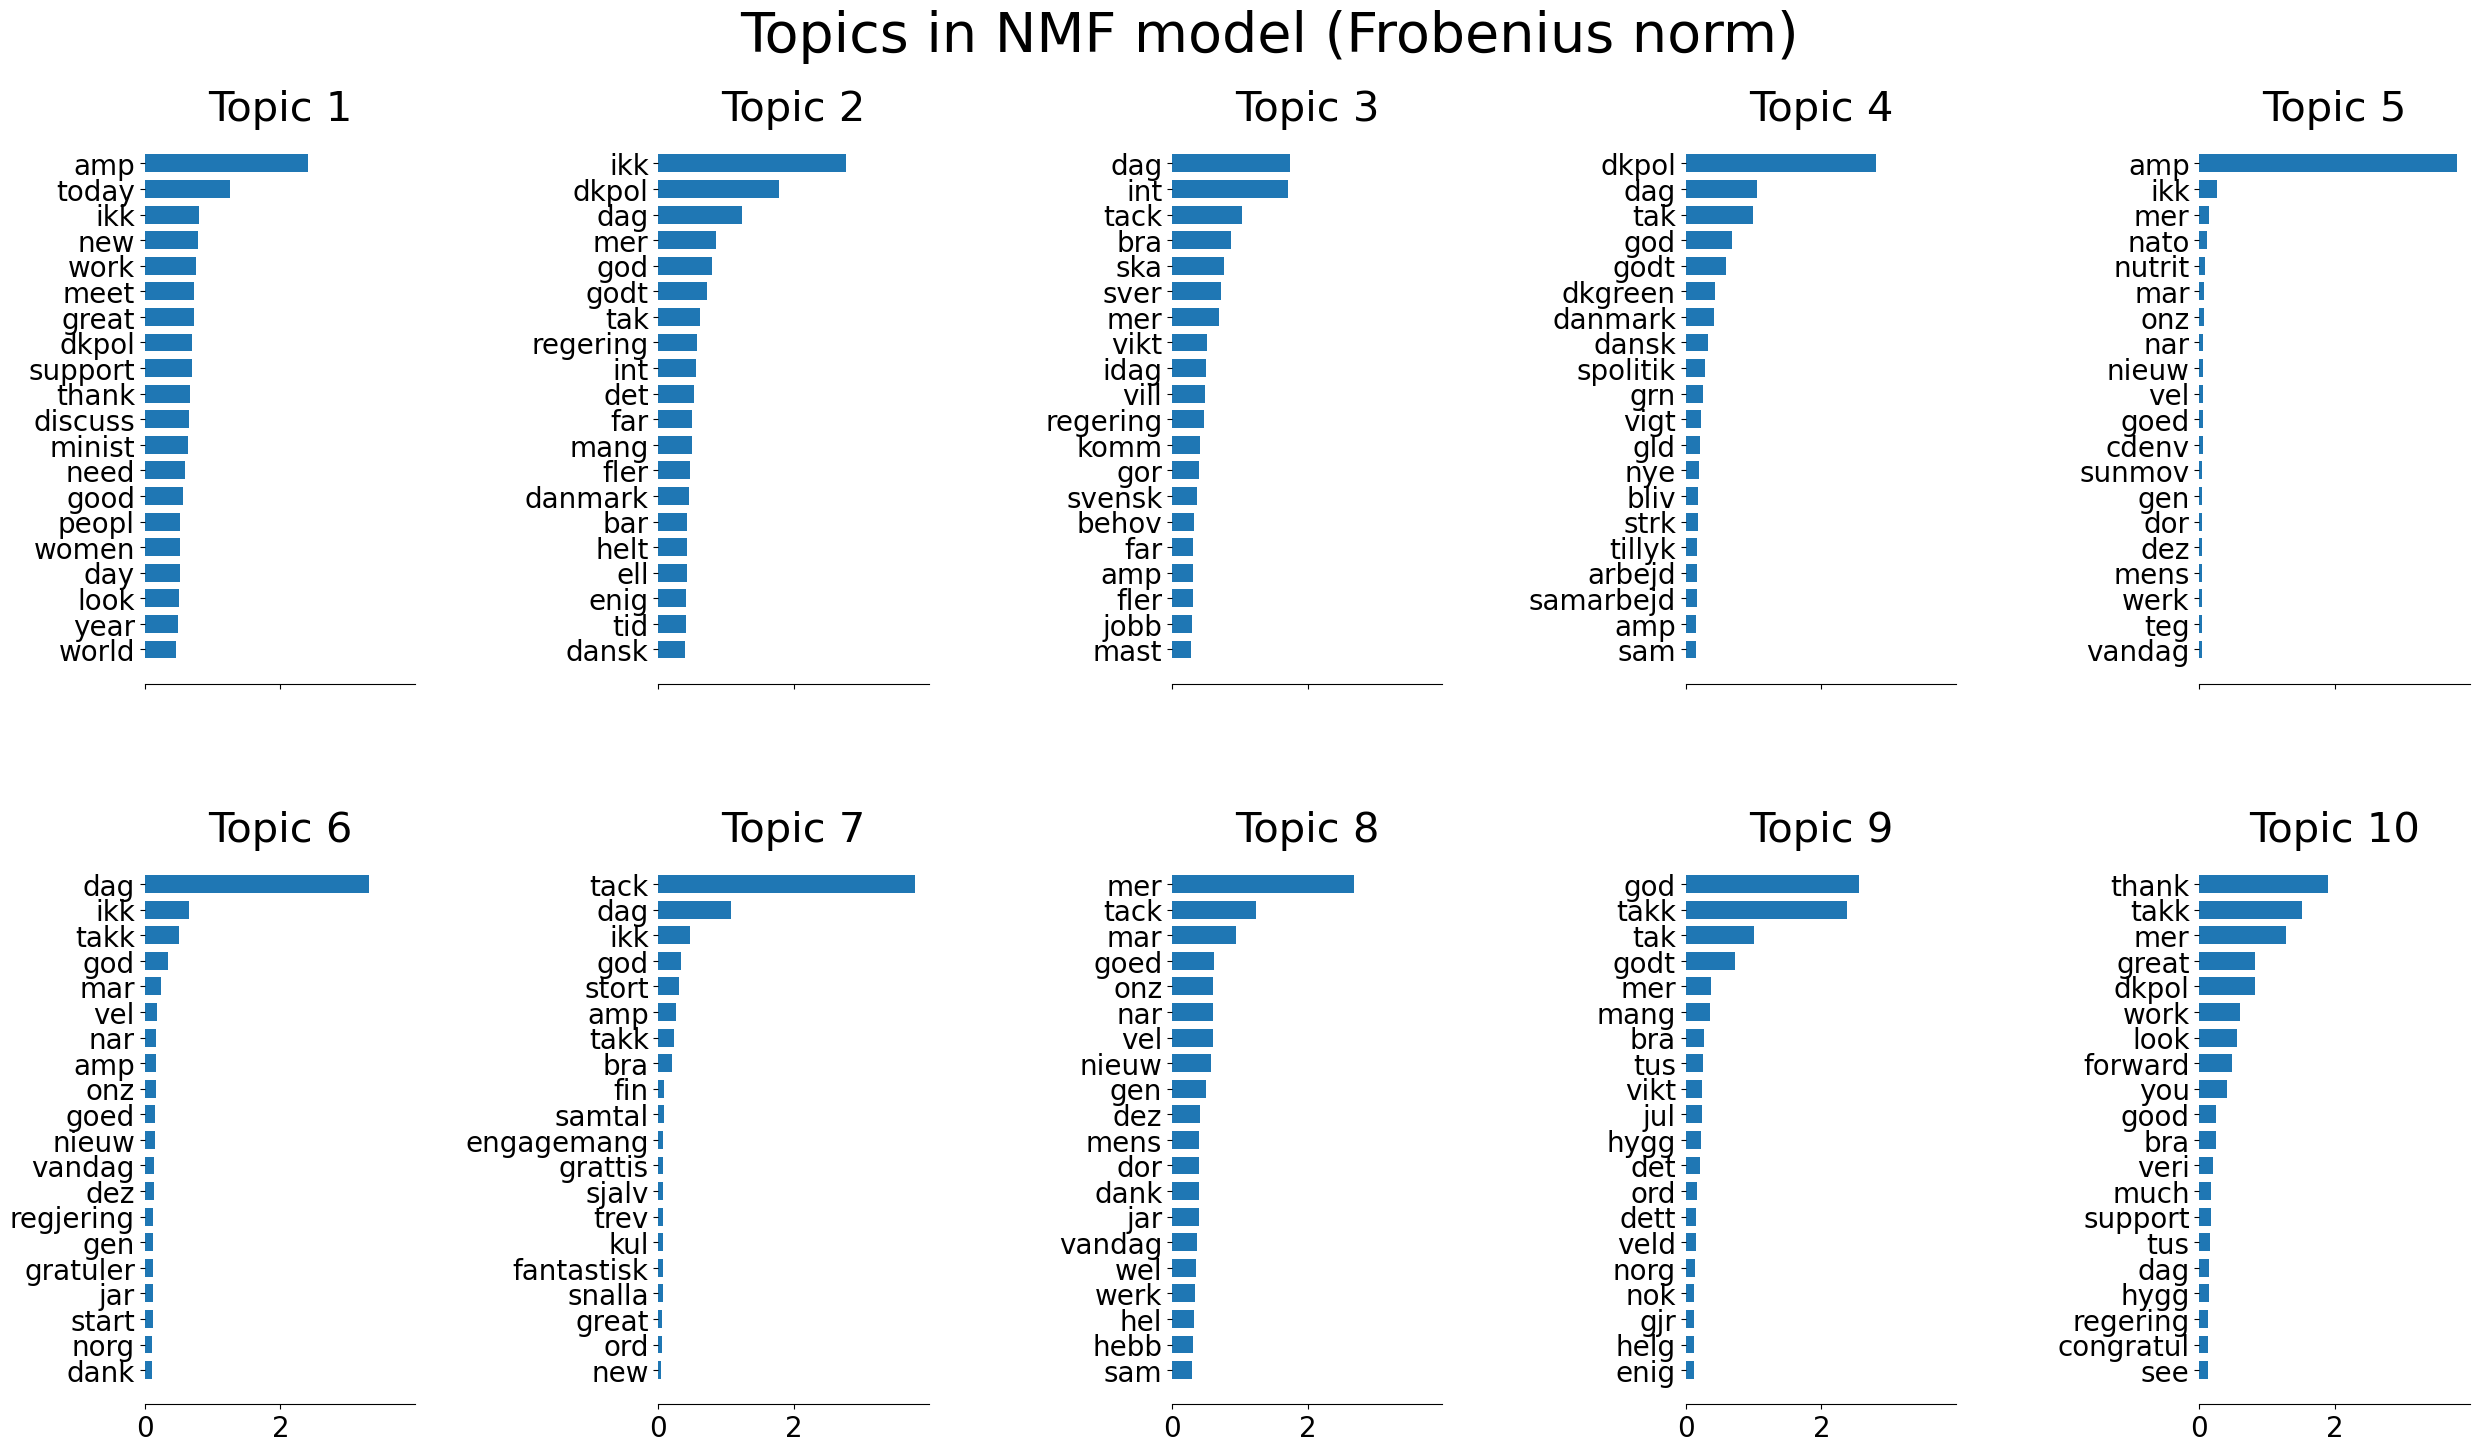

In [30]:
# using tf-idf features 
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
# fitting the NMF model (Frobenius norm).
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=404498 and n_features=100000...
done in 111.920s.


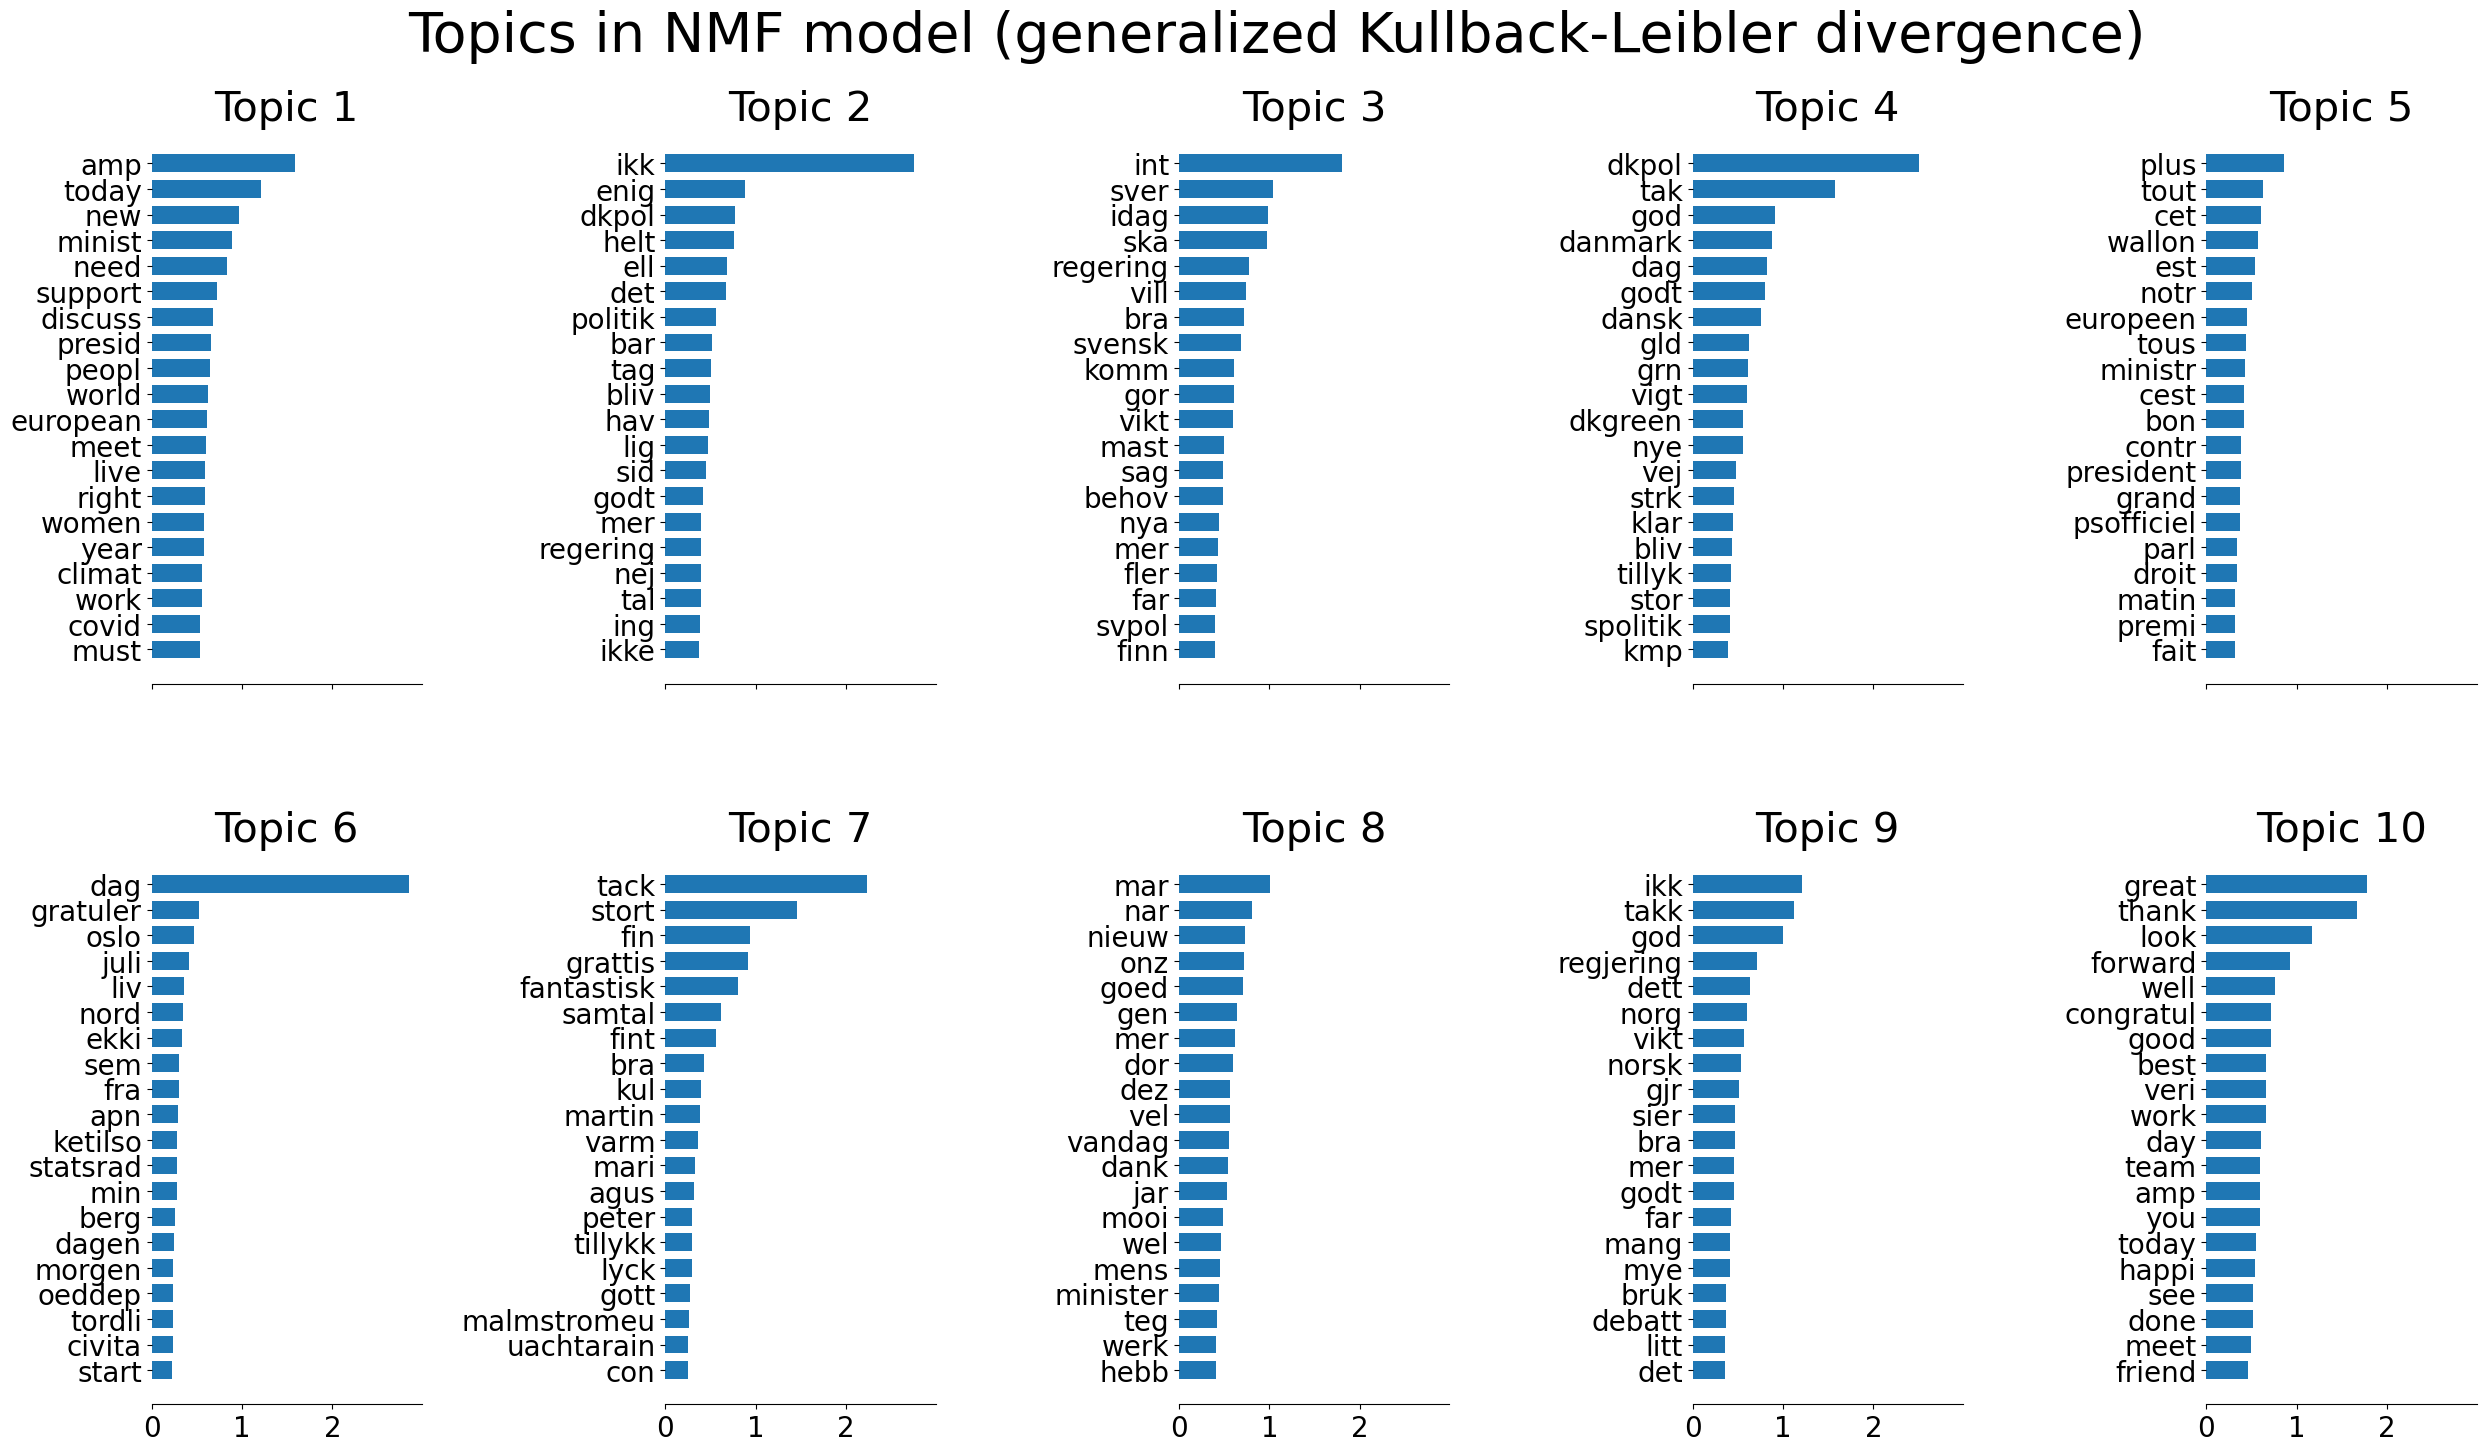

In [31]:
# fitting the NMF model (generalized Kullback-Leibler)
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

Extracting tf features for LDA...
done in 6.090s.



 Fitting LDA models with tf features, n_samples=404498 and n_features=100000...
done in 1110.073s.


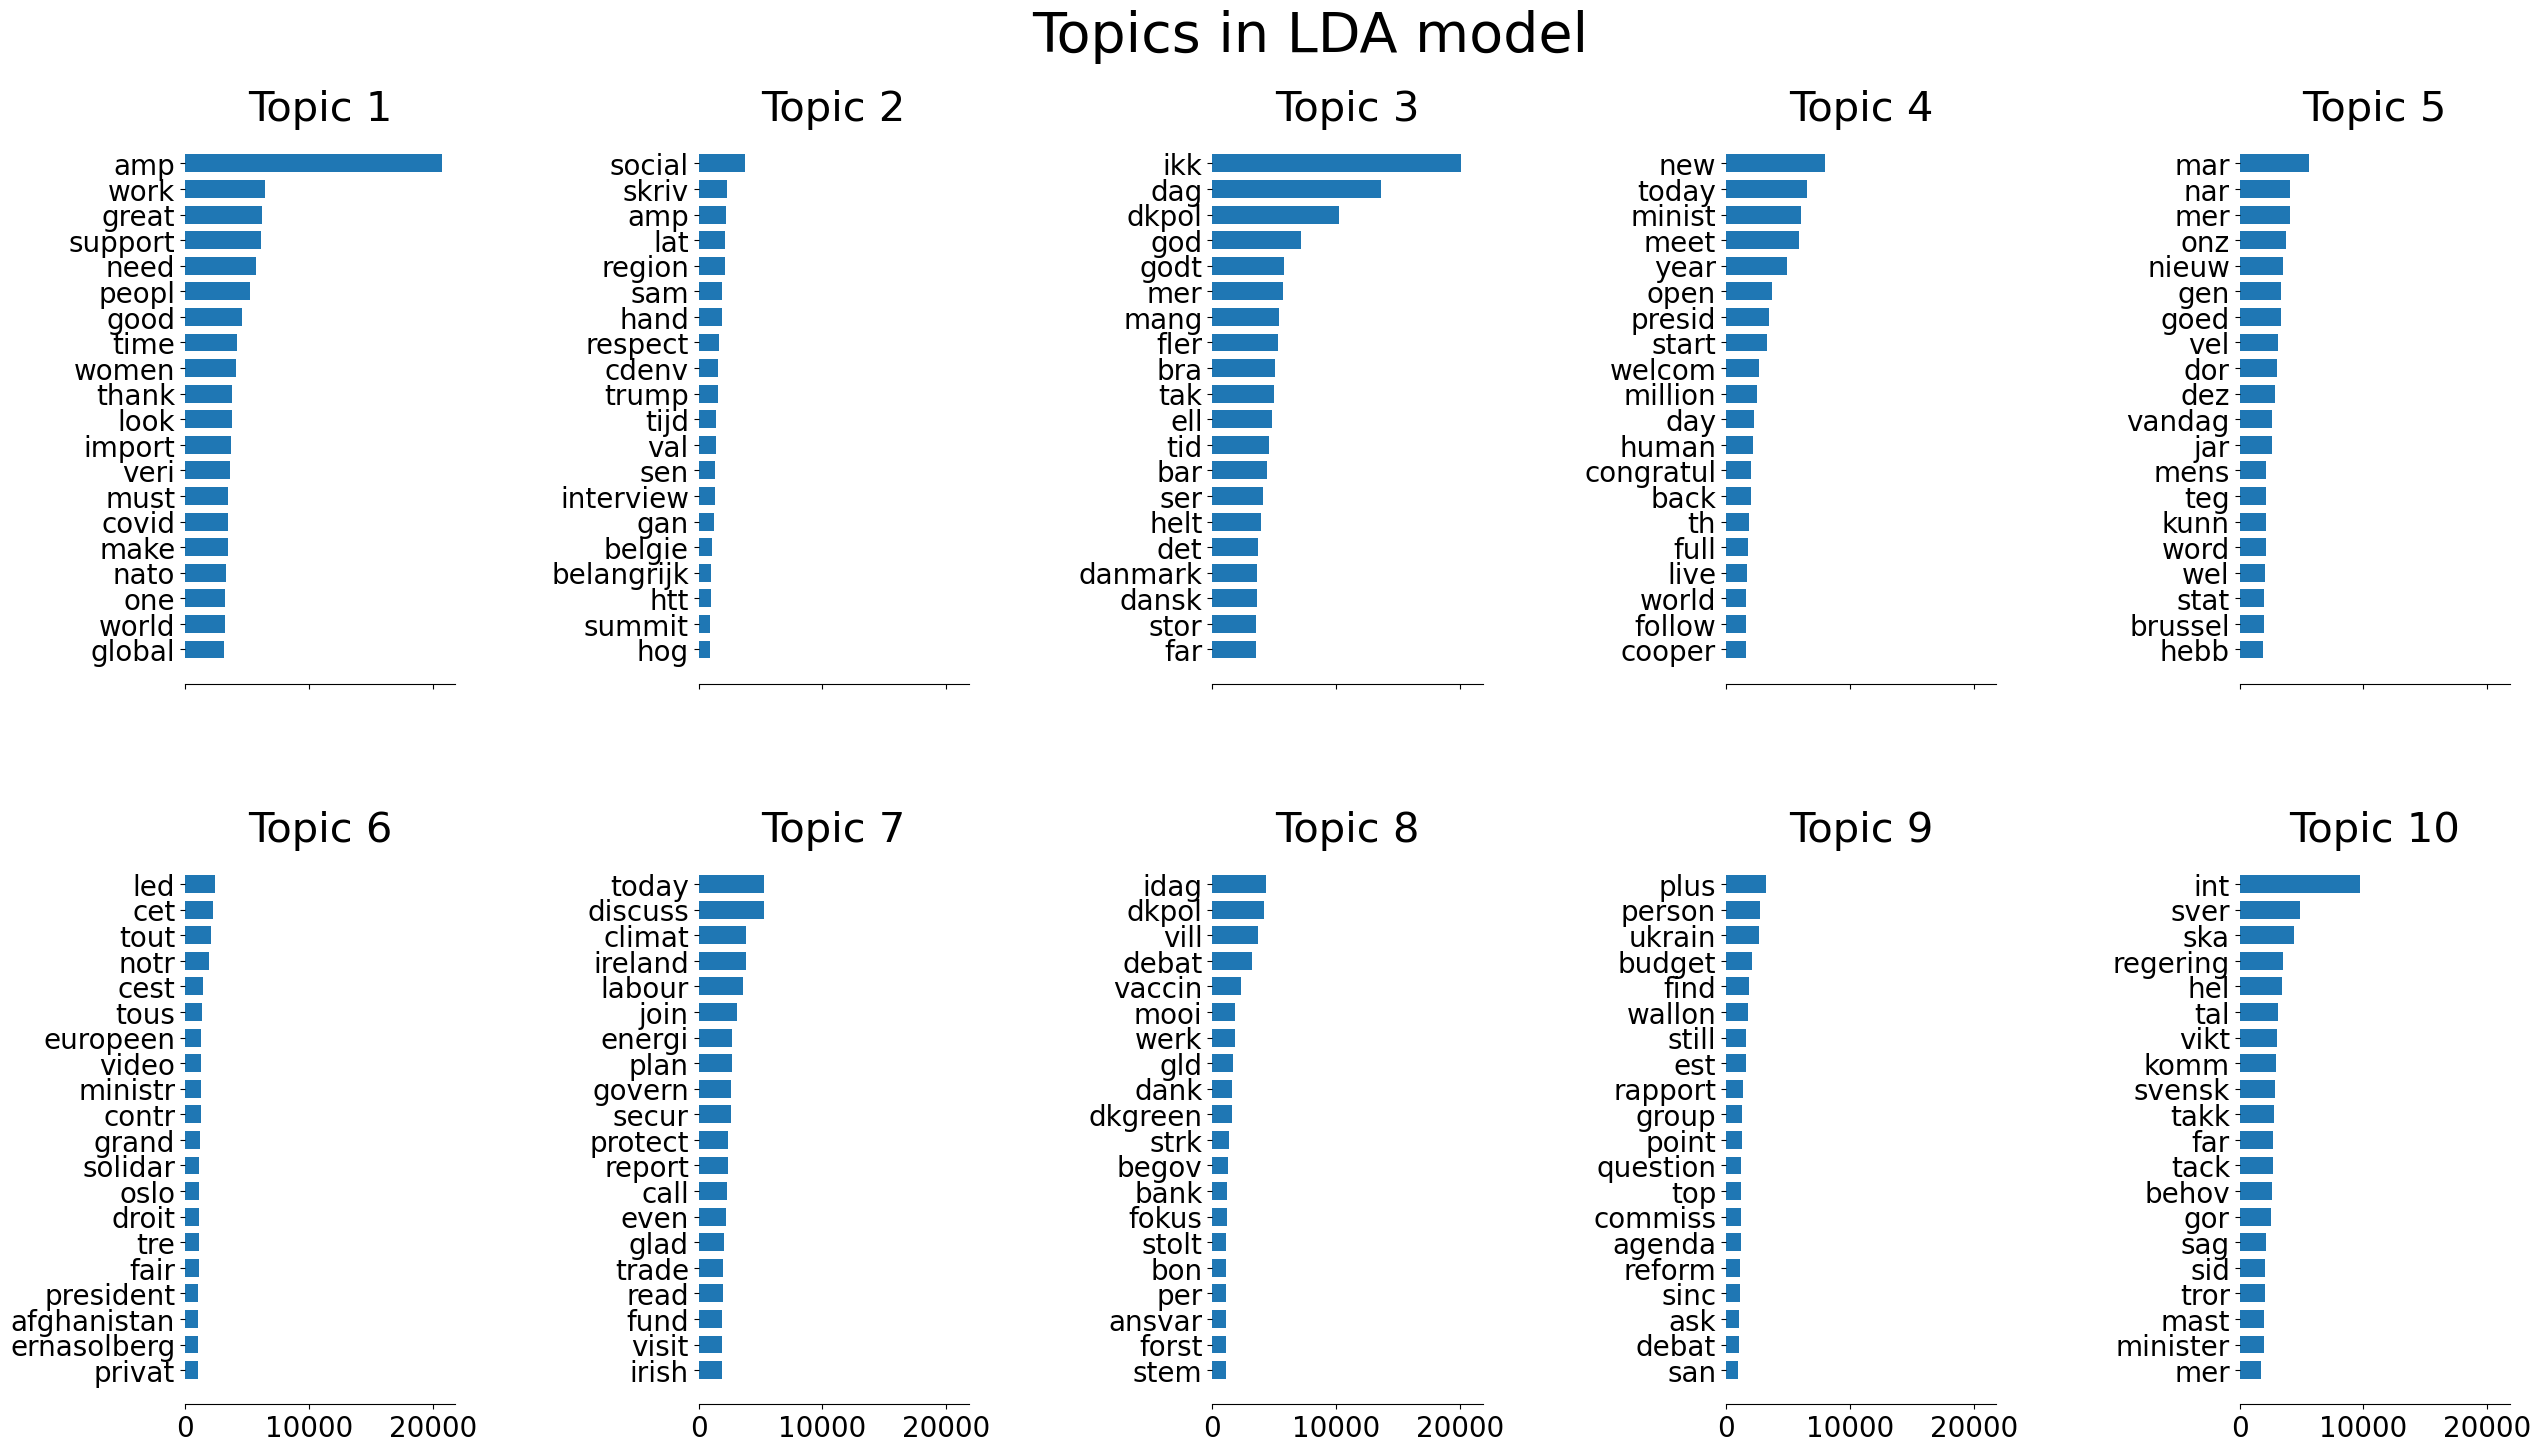

In [32]:
# using tf (raw term count) features, fitting the LDA
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()
print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

#### Inference
1) The NMF model, utilizing the Forbenius norm, exhibits a skewed distribution of words, where a significant proportion is concentrated among the top 3-4 words. However, this skewness is notably improved when we apply the LDA model, indicating that the LDA model effectively normalizes the data. Additionally, the NMF model with Kullback-Leibler divergence performs even better in normalizing the word distribution.
2) Comparing the scale of the plots, we observe that the NMF model employs a scale of (0, 2) to represent the frequency of the top 10 words, while the LDA model utilizes a scale of (0, 20000). This implies that the frequency of words within a single topic is much higher when the LDA model is employed, effectively covering a more extensive portion of the dataset.
3) However, it's worth noting that the advantage of using the LDA model comes at the expense of time. The LDA model takes more than 12 minutes to complete the topic modeling process, whereas the NMF model achieves the same results in just about a minute or two.

#### Part II: Model Creation and Prediction (50 points) Please do not post any of your code or solutions online.  This part of the analysis needs to be submitted by the deadline (no late submission will be accepted). Please use the dataset provided to you. [We should be able to run your code with the original datasets and the additional external datasets you provide.] You cannot use any other Twitter data. You can use (non-Twitter) external datasets. For this part of the analysis, you will need to train a model that classifies the tweets in your training dataset according to ‘pol_spec_user’ labels7, report the Accuracy of your best model (i), and the confusion matrix (ii) that you will create. You will mainly be graded on the Accuracy of your model (more information provided below). Some guidelines (please also review the information shared through lectures): 

#### Testing

In [33]:
# importing test dataset 
test_data = pd.read_excel('test_data.xlsx')
test_data.head()

Id                  hashtags  \
0   0                  EUAfrica   
1   1                   COVID19   
2   2                       NaN   
3   3                       NaN   
4   4  UNGA ChildrenNotSoldiers   

                                                                                                                                                                                                                                                                                                                              full_text  \
0                                                                                                                                                                           b'RT @eu_eeas: "Let me tell you that a big part of the world\'s future, and also its present, depends on Africa and #EUAfrica partnership" @Fe\xe2\x80\xa6'   
1                                                                                                                                                                            b'RT @stateofgreendk: "Although the #COVID19 pandemic overshadows our daily lives right now, we cannot forget the climate crisis. We must mak\xe2\x80\xa6'   
2                                                                                                                                                                                                        b'@hjorvarhaflida // jebb - i\xc3\xb0a\xc3\xb0i \xc3\xa1 me\xc3\xb0an \xc3\xa9g bei\xc3\xb0 \xf0\x9f\xa4\x93 \xf0\x9f\x98\x84'   
3  b'I ett l\xc3\xa4ge med pandemi, klimat, transport/vital teknik, ekonomi och s\xc3\xa4kerhetspolitiska konfliktzoner borde stor energi riktas mot att s\xc3\xa4kra svensk livsmedelsf\xc3\xb6rs\xc3\xb6rjning och energiproduktion! Liksom andra samh\xc3\xa4llsviktiga funktioner! @svt @sr_ekot Lugn och stabilitet kr\xc3\xa4vs.'   
4                                                                                                                                          b'RT @BelgiumMFA: \xf0\x9f\x93\x8d #UNGA\n\n\xf0\x9f\x92\xac "Every child deserves a safe childhood."\n\nFollow now live the #ChildrenNotSoldiers event with Queen Mathilde and\xe2\x80\xa6'   

  in_reply_to_screen_name country_user gender_user  pol_spec_user  
0                     NaN      belgium        Male            NaN  
1                     NaN      denmark        Male            NaN  
2          hjorvarhaflida      iceland      Female            NaN  
3                     NaN       sweden      Female            NaN  
4                     NaN      belgium        Male            NaN

In [34]:
# decoding UTF-8 encoded data
test_data['full_text'] = test_data['full_text'].map(lambda v: ast.literal_eval(v).decode())
test_data.head(5)

Id                  hashtags  \
0   0                  EUAfrica   
1   1                   COVID19   
2   2                       NaN   
3   3                       NaN   
4   4  UNGA ChildrenNotSoldiers   

                                                                                                                                                                                                                                                                          full_text  \
0                                                                                                                                      RT @eu_eeas: "Let me tell you that a big part of the world's future, and also its present, depends on Africa and #EUAfrica partnership" @Fe…   
1                                                                                                                                      RT @stateofgreendk: "Although the #COVID19 pandemic overshadows our daily lives right now, we cannot forget the climate crisis. We must mak…   
2                                                                                                                                                                                                                               @hjorvarhaflida // jebb - iðaði á meðan ég beið 🤓 😄   
3  I ett läge med pandemi, klimat, transport/vital teknik, ekonomi och säkerhetspolitiska konfliktzoner borde stor energi riktas mot att säkra svensk livsmedelsförsörjning och energiproduktion! Liksom andra samhällsviktiga funktioner! @svt @sr_ekot Lugn och stabilitet krävs.   
4                                                                                                                                  RT @BelgiumMFA: 📍 #UNGA\n\n💬 "Every child deserves a safe childhood."\n\nFollow now live the #ChildrenNotSoldiers event with Queen Mathilde and…   

  in_reply_to_screen_name country_user gender_user  pol_spec_user  
0                     NaN      belgium        Male            NaN  
1                     NaN      denmark        Male            NaN  
2          hjorvarhaflida      iceland      Female            NaN  
3                     NaN       sweden      Female            NaN  
4                     NaN      belgium        Male            NaN

In [35]:
#stemming
test_data['full_text'] = test_data['full_text'].apply(stem_text)
test_data.head()

Id                  hashtags  \
0   0                  EUAfrica   
1   1                   COVID19   
2   2                       NaN   
3   3                       NaN   
4   4  UNGA ChildrenNotSoldiers   

                                                                                                                                                                                                                                                              full_text  \
0                                                                                                                              rt @eu_eeas: "let me tell you that a big part of the world future, and also it present, depend on africa and #euafrica partnership" @fe…   
1                                                                                                                               rt @stateofgreendk: "although the #covid19 pandem overshadow our daili live right now, we cannot forget the climat crisis. we must mak…   
2                                                                                                                                                                                                                   @hjorvarhaflida // jebb - iðaði á meðan ég beið 🤓 😄   
3  i ett läg med pandemi, klimat, transport/vital teknik, ekonomi och säkerhetspolitisk konfliktzon bord stor energi rikt mot att säkr svensk livsmedelsförsörjning och energiproduktion! liksom andr samhällsvikt funktioner! @svt @sr_ekot lugn och stabilitet krävs.   
4                                                                                                                                  rt @belgiummfa: 📍 #unga 💬 "everi child deserv a safe childhood." follow now live the #childrennotsoldi event with queen mathild and…   

  in_reply_to_screen_name country_user gender_user  pol_spec_user  
0                     NaN      belgium        Male            NaN  
1                     NaN      denmark        Male            NaN  
2          hjorvarhaflida      iceland      Female            NaN  
3                     NaN       sweden      Female            NaN  
4                     NaN      belgium        Male            NaN

In [36]:
#lemmetizing
from lemmatizer import clean_text
test_data['text_clean'] = clean_text(test_data)
test_data.head()

Id                  hashtags  \
0   0                  EUAfrica   
1   1                   COVID19   
2   2                       NaN   
3   3                       NaN   
4   4  UNGA ChildrenNotSoldiers   

                                                                                                                                                                                                                                                              full_text  \
0                                                                                                                              rt @eu_eeas: "let me tell you that a big part of the world future, and also it present, depend on africa and #euafrica partnership" @fe…   
1                                                                                                                               rt @stateofgreendk: "although the #covid19 pandem overshadow our daili live right now, we cannot forget the climat crisis. we must mak…   
2                                                                                                                                                                                                                   @hjorvarhaflida // jebb - iðaði á meðan ég beið 🤓 😄   
3  i ett läg med pandemi, klimat, transport/vital teknik, ekonomi och säkerhetspolitisk konfliktzon bord stor energi rikt mot att säkr svensk livsmedelsförsörjning och energiproduktion! liksom andr samhällsvikt funktioner! @svt @sr_ekot lugn och stabilitet krävs.   
4                                                                                                                                  rt @belgiummfa: 📍 #unga 💬 "everi child deserv a safe childhood." follow now live the #childrennotsoldi event with queen mathild and…   

  in_reply_to_screen_name country_user gender_user  pol_spec_user  \
0                     NaN      belgium        Male            NaN   
1                     NaN      denmark        Male            NaN   
2          hjorvarhaflida      iceland      Female            NaN   
3                     NaN       sweden      Female            NaN   
4                     NaN      belgium        Male            NaN   

                                                                                                                                                                                                                      text_clean  
0                                                                                                                                               eueeas let tell big part world future present depend africa euafrica partnership  
1                                                                                                                      stateofgreendk although covid pandem overshadow daili live right now cannot forget climat crisis must mak  
2                                                                                                                                                                                               hjorvarhaflida jebb iai mean bei  
3   lag pandemi klimat transportvital teknik ekonomi sakerhetspolitisk konfliktzon bord stor energi rikt sakr svensk livsmedelsforsorjning energiproduktion liksom andr samhallsvikt funktioner svt srekot lugn stabilitet kravs  
4                                                                                                                         belgiummfa unga everi child deserv safe childhood follow live childrennotsoldi event queen mathild and

In [37]:
from nltk.tokenize import word_tokenize
test_data['text_clean'] = test_data['text_clean'].astype(str)
#tokenize the text in the 'text_clean' column
test_data['text_clean_new'] = test_data['text_clean'].apply(lambda x: word_tokenize(x))
test_data.head()

Id                  hashtags  \
0   0                  EUAfrica   
1   1                   COVID19   
2   2                       NaN   
3   3                       NaN   
4   4  UNGA ChildrenNotSoldiers   

                                                                                                                                                                                                                                                              full_text  \
0                                                                                                                              rt @eu_eeas: "let me tell you that a big part of the world future, and also it present, depend on africa and #euafrica partnership" @fe…   
1                                                                                                                               rt @stateofgreendk: "although the #covid19 pandem overshadow our daili live right now, we cannot forget the climat crisis. we must mak…   
2                                                                                                                                                                                                                   @hjorvarhaflida // jebb - iðaði á meðan ég beið 🤓 😄   
3  i ett läg med pandemi, klimat, transport/vital teknik, ekonomi och säkerhetspolitisk konfliktzon bord stor energi rikt mot att säkr svensk livsmedelsförsörjning och energiproduktion! liksom andr samhällsvikt funktioner! @svt @sr_ekot lugn och stabilitet krävs.   
4                                                                                                                                  rt @belgiummfa: 📍 #unga 💬 "everi child deserv a safe childhood." follow now live the #childrennotsoldi event with queen mathild and…   

  in_reply_to_screen_name country_user gender_user  pol_spec_user  \
0                     NaN      belgium        Male            NaN   
1                     NaN      denmark        Male            NaN   
2          hjorvarhaflida      iceland      Female            NaN   
3                     NaN       sweden      Female            NaN   
4                     NaN      belgium        Male            NaN   

                                                                                                                                                                                                                      text_clean  \
0                                                                                                                                               eueeas let tell big part world future present depend africa euafrica partnership   
1                                                                                                                      stateofgreendk although covid pandem overshadow daili live right now cannot forget climat crisis must mak   
2                                                                                                                                                                                               hjorvarhaflida jebb iai mean bei   
3   lag pandemi klimat transportvital teknik ekonomi sakerhetspolitisk konfliktzon bord stor energi rikt sakr svensk livsmedelsforsorjning energiproduktion liksom andr samhallsvikt funktioner svt srekot lugn stabilitet kravs   
4                                                                                                                         belgiummfa unga everi child deserv safe childhood follow live childrennotsoldi event queen mathild and   

                                                                                                                                                                                                                                           text_clean_new  
0                                                                                                                                                        

#### Model

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import xgboost as xgb 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [39]:
training_data = train_data
training_data.head()

hashtags  \
0  feminist AskMeAnything   
1                     NaN   
2                     NaN   
3                     NaN   
5                     NaN   

                                                                                                                                                                                                                                                                                       full_text  \
0                                                                                                                                                       rt @swedennewyork: what doe it mean to have a #feminist government? join us on @reddit at 10 am (est) friday 3/23 for an #askmeanyth se…   
1                                                                                                                                                                                                         jen stoltenberg åpn virtuell rockheim i dag, sjekk det ut du også http://bit.ly/1b6nt5   
2                                                                                                                                                                                                                                                   @panenka_bart vel beterschap bart en loes! 🥰   
3                                                                                                                                                                  rt @carlemillind: tyd s aftryk: pskykiatri styrk 110% co2 reduktion i 2050 praktisk folkeskol + mesterlær annulationssøgsmål…   
5  idag tog först spadtaget i kigali för biontech först vaccinfabrik i afrika. ämn för att producer vaccin i afrik för afrika. skall försörj helt med solenergi. grund ugur sahin på plat förstås. stolt över att eib finansier biontech utveckling av vaccin mot covid. https://t.co/qqxm6flvcm   

  in_reply_to_screen_name country_user gender_user pol_spec_user  \
0                     NaN       sweden        Male          Left   
1                     NaN       norway        Male          Left   
2             BartDerwael      belgium        Male          Left   
3                     NaN      denmark      Female          Left   
5                     NaN       sweden        Male          Left   

                                                                                                                                                                                                             text_clean  \
0                                                                                                                                          swedennewyork doe mean feminist government join reddit est friday askmeanyth   
1                                                                                                                                                                       jen stoltenberg apn virtuell rockheim dag sjekk   
2                                                                                                                                                                                  panenkabart vel beterschap bart loes   
3                                                                                                                   carlemillind tyd aftryk pskykiatri styrk co reduktion praktisk folkeskol mesterlr annulationssgsmal   
5   idag tog forst spadtaget kigali biontech forst vaccinfabrik afrika amn producer vaccin afrik afrika skall forsorj helt solenergi grund ugur sahin plat forstas stolt eib finansier biontech utveckling vaccin covid   

                                                                                                                                                                                                                                       text_clean_new  
0                                                                                                                    

In [40]:
testing_data = test_data
testing_data.head()

Id                  hashtags  \
0   0                  EUAfrica   
1   1                   COVID19   
2   2                       NaN   
3   3                       NaN   
4   4  UNGA ChildrenNotSoldiers   

                                                                                                                                                                                                                                                              full_text  \
0                                                                                                                              rt @eu_eeas: "let me tell you that a big part of the world future, and also it present, depend on africa and #euafrica partnership" @fe…   
1                                                                                                                               rt @stateofgreendk: "although the #covid19 pandem overshadow our daili live right now, we cannot forget the climat crisis. we must mak…   
2                                                                                                                                                                                                                   @hjorvarhaflida // jebb - iðaði á meðan ég beið 🤓 😄   
3  i ett läg med pandemi, klimat, transport/vital teknik, ekonomi och säkerhetspolitisk konfliktzon bord stor energi rikt mot att säkr svensk livsmedelsförsörjning och energiproduktion! liksom andr samhällsvikt funktioner! @svt @sr_ekot lugn och stabilitet krävs.   
4                                                                                                                                  rt @belgiummfa: 📍 #unga 💬 "everi child deserv a safe childhood." follow now live the #childrennotsoldi event with queen mathild and…   

  in_reply_to_screen_name country_user gender_user  pol_spec_user  \
0                     NaN      belgium        Male            NaN   
1                     NaN      denmark        Male            NaN   
2          hjorvarhaflida      iceland      Female            NaN   
3                     NaN       sweden      Female            NaN   
4                     NaN      belgium        Male            NaN   

                                                                                                                                                                                                                      text_clean  \
0                                                                                                                                               eueeas let tell big part world future present depend africa euafrica partnership   
1                                                                                                                      stateofgreendk although covid pandem overshadow daili live right now cannot forget climat crisis must mak   
2                                                                                                                                                                                               hjorvarhaflida jebb iai mean bei   
3   lag pandemi klimat transportvital teknik ekonomi sakerhetspolitisk konfliktzon bord stor energi rikt sakr svensk livsmedelsforsorjning energiproduktion liksom andr samhallsvikt funktioner svt srekot lugn stabilitet kravs   
4                                                                                                                         belgiummfa unga everi child deserv safe childhood follow live childrennotsoldi event queen mathild and   

                                                                                                                                                                                                                                           text_clean_new  
0                                                                                                                                                        

In [41]:
from sklearn.impute import SimpleImputer
# imputing missing text_clean values
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='')
training_data['text_clean'] = imputer.fit_transform(training_data[['text_clean']]) 
testing_data['text_clean'] = imputer.transform(testing_data[['text_clean']])

In [42]:
# checking for NaN values in 'text_clean' column
nan_indices = testing_data[testing_data['text_clean'].isna()].index
if len(nan_indices) > 0:
    print("NaN values found in 'text_clean' column at indices:", nan_indices)
else:
    print("No NaN values found in 'text_clean' column.")

No NaN values found in 'text_clean' column.


In [43]:
# Built ensemble model using Naive Bayes, SVM, XGBoost
# For each country-gender group,  models are built. Then, we take vote for prediction.
country_gender_groups = []
accuracy_by_group = []
countries = training_data.country_user.unique().tolist()
countries.sort()
genders = training_data.gender_user.unique().tolist()
ensemble_validation = pd.DataFrame([])
ensemble_predictions = pd.DataFrame([])

In [44]:
for c in countries:
    for g in genders:
        print('Country: ', c)
        print('Gender: ', g)
        country_gender_groups.append(c+'_'+g)
        
        data = training_data[(training_data["country_user"] == c) &
                            (training_data["gender_user"] == g)]
        X = data.text_clean
        y = data.pol_spec_user
        # label encoding
        le = LabelEncoder()
        y = le.fit_transform(y)
        # class Balancing by RandomOverSampler
        ros = RandomOverSampler()
        rov_x, rov_y = ros.fit_resample(np.array(X).reshape(-1, 1), 
                                            np.array(y).reshape(-1, 1));
        rov_os = pd.DataFrame(list(zip([x[0] for x in rov_x], rov_y)), 
                              columns = ['text_clean', 'pol_spec_user']);

        rov_os.text_clean.fillna("", inplace = True)
        num_classes = len(rov_os['pol_spec_user'].unique())

        # final train set, we will divide it to train and valid in the following steps
        X = rov_os['text_clean'].values
        y = rov_os['pol_spec_user'].values
        X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                            test_size=0.05, 
                                                            random_state = 1)
        print("Naive Bayes..")
        nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
        nb.fit(X_train, y_train)
        
        print("SGD..")
        sgd = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-6, random_state=3, max_iter=12, tol=None)),
                       ])
        sgd.fit(X_train, y_train)
        print("XGBoost..")
        if num_classes >2:
            xgclf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', xgb.XGBClassifier(random_state=7,num_class=num_classes,objective='multi:softprob',learning_rate = 0.2,max_depth = 6,n_estimators = 500)),
                    ])
            xgclf.fit(X_train, y_train)
        else: 
            xgclf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', xgb.XGBClassifier(random_state=7,objective='binary:logistic',learning_rate = 0.2,max_depth = 6,n_estimators = 500)),
                    ])
            xgclf.fit(X_train, y_train)
        
        # validation data
        # ensembling
        nb_pred = nb.predict(X_val)
        sgd_pred = sgd.predict(X_val)
        xgclf_pred = xgclf.predict(X_val)
        
        result = pd.DataFrame({'nb_pred': nb_pred, 'sgd_pred': sgd_pred, 'xgclf_pred':xgclf_pred})
        result = result.mode(axis=1)
        y_pred = result[0]
        
        valid = pd.DataFrame({'actual': y_val, 'prediction': y_pred.to_numpy()})
        ensemble_validation = ensemble_validation._append(valid) # for confusion matrix to see ensemble model performance
        
        val_acc = accuracy_score(y_pred.to_numpy(), y_val)
        accuracy_by_group.append(val_acc)
        print('Accuracy: %s' % val_acc)
        print("_________________________________________________________________________________________________")

        # test data
        test_data = testing_data[(testing_data["country_user"] == c) &
                            (testing_data["gender_user"] == g)]
        X_test = test_data.text_clean
        X_test.fillna("", inplace = True)
        
        # ensembling
        nb_pred = nb.predict(X_test)
        sgd_pred = sgd.predict(X_test)
        xgclf_pred = xgclf.predict(X_test)
        
        result = pd.DataFrame({'nb_pred': nb_pred, 'sgd_pred': sgd_pred, 'xgclf_pred':xgclf_pred})
        result = result.mode(axis=1)
        y_pred = result[0]
        
        result = pd.DataFrame({'Id': test_data.Id.to_numpy(), 'pol_spec_user': y_pred.to_numpy().astype(int)})
        result["pol_spec_user_name"] = le.inverse_transform(result["pol_spec_user"])
        ensemble_predictions = ensemble_predictions._append(result)

Country:  belgium
Gender:  Male
Naive Bayes..
SGD..
XGBoost..
Accuracy: 0.8343871099326943
_________________________________________________________________________________________________
Country:  belgium
Gender:  Female
Naive Bayes..
SGD..
XGBoost..
Accuracy: 0.9095519864750634
_________________________________________________________________________________________________
Country:  denmark
Gender:  Male
Naive Bayes..
SGD..
XGBoost..
Accuracy: 0.790501852475581
_________________________________________________________________________________________________
Country:  denmark
Gender:  Female
Naive Bayes..
SGD..
XGBoost..
Accuracy: 0.851013672795851
_________________________________________________________________________________________________
Country:  iceland
Gender:  Male
Naive Bayes..
SGD..
XGBoost..
Accuracy: 0.9080459770114943
_________________________________________________________________________________________________
Country:  iceland
Gender:  Female
Naive Bayes..
SGD..

In [45]:
# validation accuracy dataframe
validation_accuracy_plot = pd.DataFrame({'Group_Country_Gender': country_gender_groups, 'Validation_Accuracy': accuracy_by_group})
validation_accuracy_plot

Group_Country_Gender  Validation_Accuracy
0          belgium_Male             0.834387
1        belgium_Female             0.909552
2          denmark_Male             0.790502
3        denmark_Female             0.851014
4          iceland_Male             0.908046
5        iceland_Female             1.000000
6          ireland_Male             0.856748
7        ireland_Female             0.969191
8      netherlands_Male             0.920104
9    netherlands_Female             0.972578
10          norway_Male             0.832672
11        norway_Female             0.922753
12          sweden_Male             0.901679
13        sweden_Female             0.857097

In [46]:
# plot for validation accuracy
fig = px.line(
    validation_accuracy_plot,
    x='Group_Country_Gender',
    y='Validation_Accuracy',
    title='Validation Accuracy by Group',
    labels={'Group_Country_Gender': 'Group (Country-Gender)', 'Validation_Accuracy': 'Validation Accuracy'},
    height=600,
    width=1000,
    line_shape='linear',  # You can customize the line shape as needed
    color_discrete_sequence=['#000526']  # Set the line color to '#fafbff'
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_range=[0, 1],
    xaxis_title=None,
    yaxis_title='Accuracy',
    font=dict(size=12),
    title_x=0.5 
)
# line plot
fig.show()

In [47]:
# confusion matrix 
print('Validation accuracy %s' % accuracy_score(ensemble_validation.prediction, ensemble_validation.actual))
my_tags = list(training_data['pol_spec_user'].unique())
print(classification_report(ensemble_validation.actual, ensemble_validation.prediction,target_names=my_tags))

Validation accuracy 0.8654214059619465
              precision    recall  f1-score   support

        Left       0.84      0.92      0.88      9716
       Right       0.86      0.82      0.84      9557
      Center       0.89      0.86      0.87      9405
 Independent       0.90      0.85      0.87        71

    accuracy                           0.87     28749
   macro avg       0.87      0.86      0.87     28749
weighted avg       0.87      0.87      0.87     28749



In [48]:
# final result
ensemble_predictions_final = ensemble_predictions.sort_values('Id')
ensemble_predictions_final = ensemble_predictions_final.drop(columns=['pol_spec_user'])
ensemble_predictions_final = ensemble_predictions_final.rename(columns={'pol_spec_user_name': 'pol_spec_user'})
ensemble_predictions_final.head()

Id pol_spec_user
0   0         Right
0   1         Right
0   2          Left
0   3        Center
1   4         Right

In [49]:
# saving in csv format
ensemble_predictions_final.to_csv('kaggle_prediction_aradhya_richa_final.csv', header=True, index=False)